Combined plot saved as 'logs\combined_plot.png'


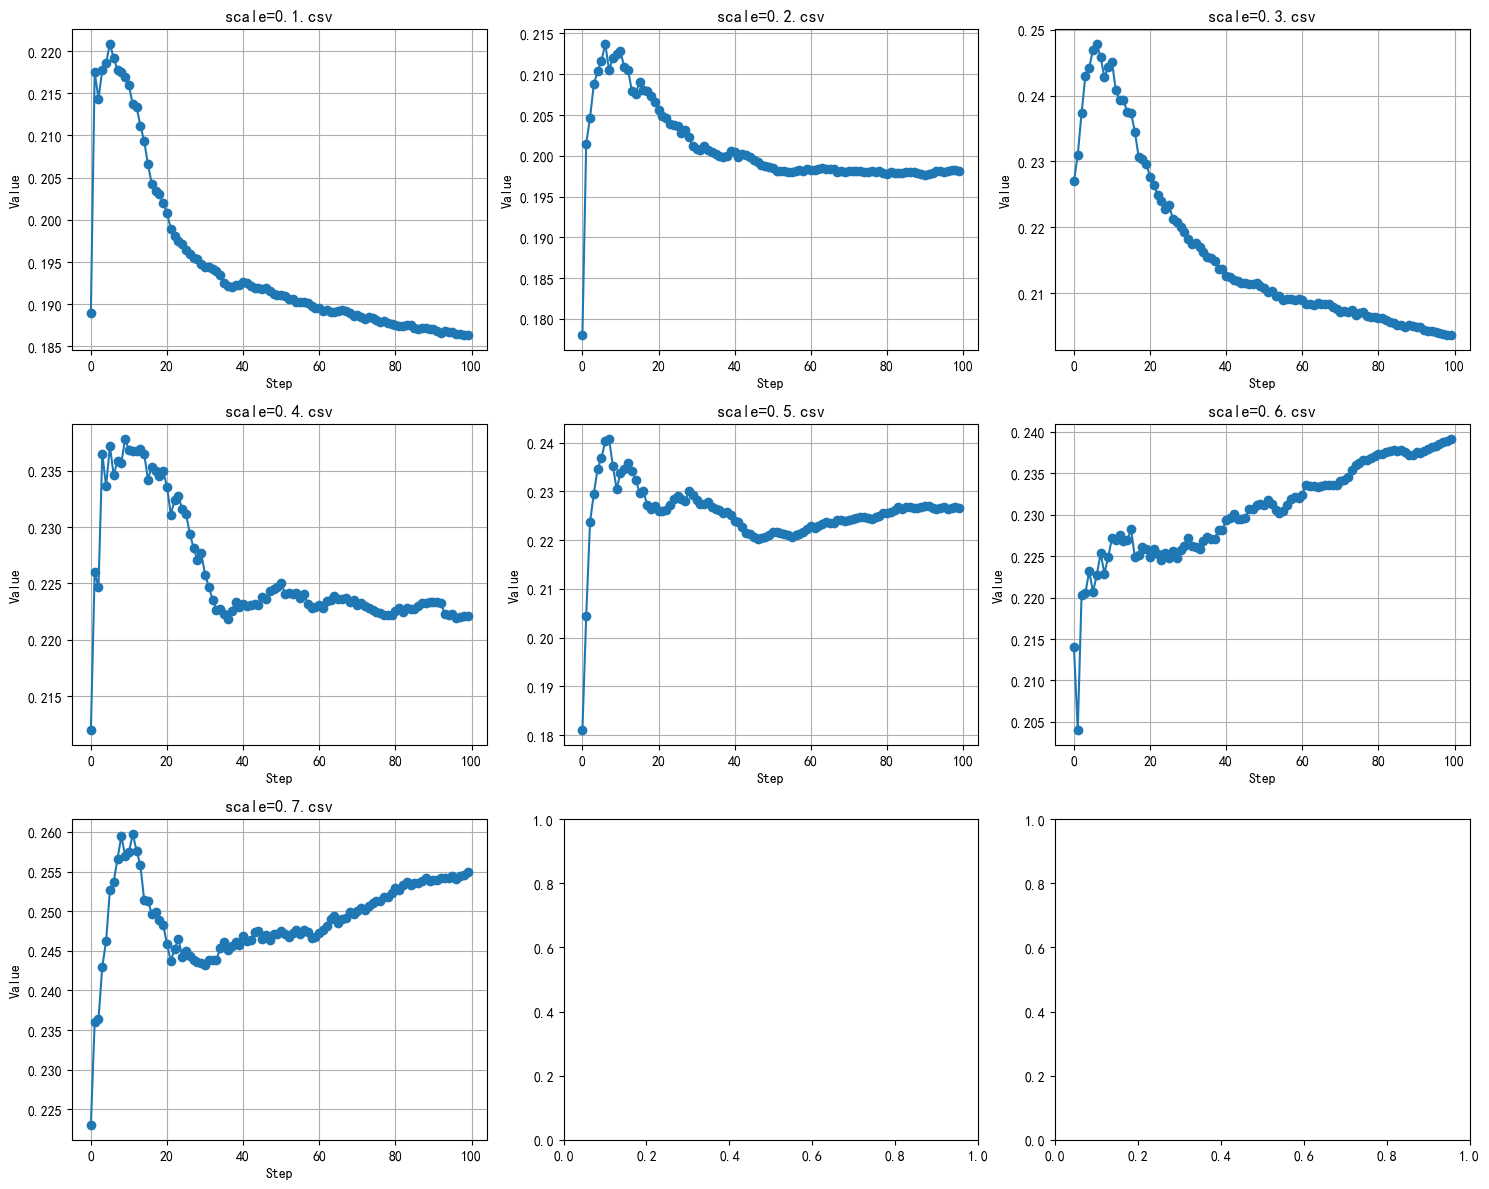

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

# 指定存储图像的目录
output_dir = '储存图像1'

# 如果目录不存在，创建它
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 列出包含数据的CSV文件
csv_files = [file for file in os.listdir(output_dir) if file.endswith('.csv')]

# 计算行数和列数以排列子图
num_plots = len(csv_files)
num_rows = 3  # 3行
num_cols = (num_plots + num_rows - 1) // num_rows  # 自动计算列数

# 创建大图
fig, axs = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))

# 循环处理每个CSV文件
for i, csv_file in enumerate(csv_files):
    # 构建CSV文件的完整路径
    csv_path = os.path.join(output_dir, csv_file)

    # 读取CSV文件为DataFrame
    df = pd.read_csv(csv_path)

    # 获取横坐标和纵坐标数据
    x_data = df.iloc[:, 1]  # 第二列作为横坐标
    y_data = df.iloc[:, 2]  # 第三列作为纵坐标

    # 计算当前子图的位置
    row_idx = i // num_cols
    col_idx = i % num_cols

    # 绘制子图
    axs[row_idx, col_idx].plot(x_data, y_data, marker='o')
    axs[row_idx, col_idx].set_title(f"scale={csv_file}")  # 使用文件名作为子图标题
    axs[row_idx, col_idx].set_xlabel(df.columns[1])  # 使用第二列列名作为横坐标轴标签
    axs[row_idx, col_idx].set_ylabel(df.columns[2])  # 使用第三列列名作为纵坐标轴标签
    axs[row_idx, col_idx].grid()

# 调整布局
plt.tight_layout()

# 保存整个大图
output_filename = os.path.join(output_dir, "combined_plot.png")
plt.savefig(output_filename)
print(f"Combined plot saved as '{output_filename}'")

# 显示图形
plt.show()


In [13]:
import pandas as pd

data = [
    [1582, 3975928.4401138374, 324.5597427781847, 1.993567746770728, 2.2075657844543457, 0.18633, 0.22083333333333333, 0.36052, 0.3619, 1.7117971181869507],
    [1584, 7393907.29052611, 355.427783127883, 3.047734769443306, 2.3611819744110107, 0.19817, 0.21371428571428572, 0.44318, 0.44318, 1.5631502866744995],
    [1586, 3047961.848739721, 393.8618260907435, 3.4933766292993758, 2.3283474445343018, 0.2037, 0.24785714285714286, 0.5012, 0.5012, 1.3932342529296875],
    [1585, 3470221.2032810627, 412.9257023254835, 3.145215443349622, 2.3296754360198975, 0.22208, 0.2378, 0.5554, 0.5554, 1.248897910118103],
    [1584, 3316261.0827689082, 343.03099916321924, 3.2481658445039434, 2.515745162963867, 0.22663, 0.24075, 0.60302, 0.60302, 1.1374059915542603],
    [1585, 8518124.554423664, 360.86616152242584, 3.7810177450933447, 2.3634724617004395, 0.23914, 0.23914, 0.65364, 0.65364, 1.0726044178009033],
    [1583, 19869478.553555332, 431.0460191426597, 3.6362499071074517, 2.310307502746582, 0.2549, 0.25975, 0.70854, 0.70854, 0.8167248964309692],
    [1584, 11240762.104402538, 388.0120325468617, 3.3096669112149177, 2.3013765811920166, 0.26786, 0.2829, 0.7787, 0.78024, 0.6140181422233582],
    [1582, 30222015.797909748, 349.584362819477, 3.2976963312479777, 2.7413642406463623, 0.26556, 0.2715, 0.90796, 0.9111, 0.28141817450523376]
]

columns = ['rk_max_index_scale', 'rk_max_value_scale', 'Rk_max_value_sacel', 'r0_sacle',
           '在测试集中的最终损失', '在测试集中的最终准确率', '在测试集中的最佳准确率',
           '在训练集中的最终准确率', '在训练集中的最佳准确率', '在训练集中的最终损失']

index = ['scale=0.1', 'scale=0.2', 'scale=0.3', 'scale=0.4', 'scale=0.5', 'scale=0.6', 'scale=0.7', 'scale=0.8', 'scale=0.9']

df = pd.DataFrame(data, index=index, columns=columns)


In [14]:
# 选择所关心的列
columns_of_interest = ['在测试集中的最佳准确率', 'rk_max_value_scale', 'Rk_max_value_sacel', 'r0_sacle']

# 计算相关性系数
correlation_coefficients = []
for col in columns_of_interest[1:]:
    correlation_coefficient = df['在测试集中的最佳准确率'].corr(df[col])
    correlation_coefficients.append(correlation_coefficient)

# 保存相关性系数到列表
correlation_coefficients_list = correlation_coefficients

# 输出相关性系数列表
print("相关性系数与'rk_max_value_scale'的相关性:", correlation_coefficients_list[0])
print("相关性系数与'Rk_max_value_sacel'的相关性:", correlation_coefficients_list[1])
print("相关性系数与'r0_sacle'的相关性:", correlation_coefficients_list[2])


相关性系数与'rk_max_value_scale'的相关性: 0.6121329734346537
相关性系数与'Rk_max_value_sacel'的相关性: 0.3956754190147747
相关性系数与'r0_sacle'的相关性: 0.4829778459565733


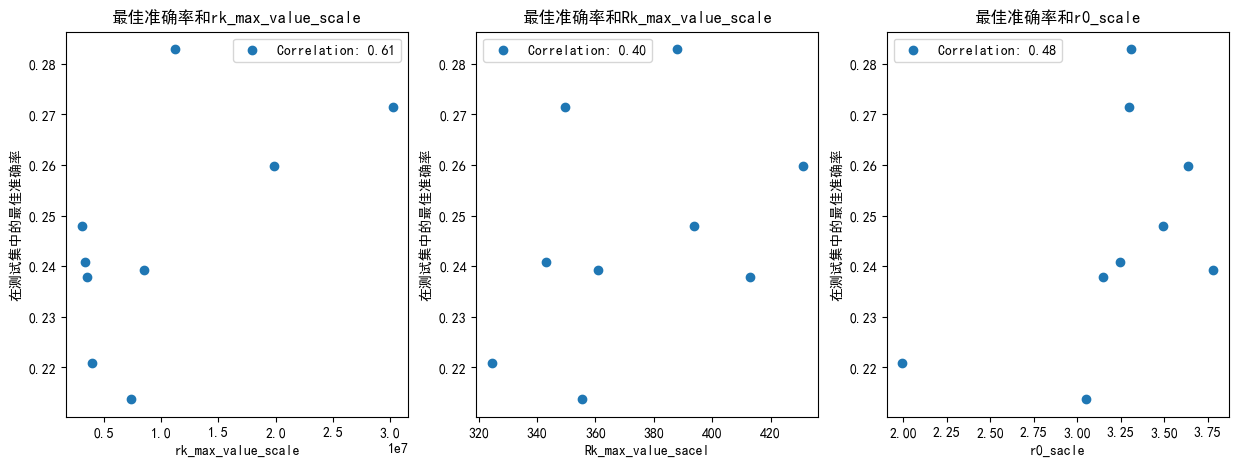

In [19]:
import matplotlib.pyplot as plt

# 选择所关心的列
columns_of_interest = ['在测试集中的最佳准确率', 'rk_max_value_scale', 'Rk_max_value_sacel', 'r0_sacle']

# 创建三张子图
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 计算并添加相关性系数到图例
correlation_coefficients = []
for i, col in enumerate(columns_of_interest[1:]):
    correlation_coefficient = df['在测试集中的最佳准确率'].corr(df[col])
    correlation_coefficients.append(correlation_coefficient)
    axs[i].scatter(df[col], df['在测试集中的最佳准确率'], marker='o', label=f'Correlation: {correlation_coefficient:.2f}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('在测试集中的最佳准确率')
    axs[i].legend()

# 设置子图标题
axs[0].set_title('最佳准确率和rk_max_value_scale')
axs[1].set_title('最佳准确率和Rk_max_value_scale')
axs[2].set_title('最佳准确率和r0_scale')

# 保存图片
# for i, col in enumerate(columns_of_interest[1:]):
output_filename = f'保留图片/测试集中的最佳准确率和rank之间的关系.png'
plt.savefig(output_filename)

# 显示图片
plt.show()
